In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:

def calculate_probability(up_move, down_move):
    """
    Calculate the probability of an "up" move to keep the expected value at 1
    after an infinite number of steps.

    Parameters:
    - up_move (float): The multiplier for an "up" move (e.g., 1.1 for a 10% increase).
    - down_move (float): The multiplier for a "down" move (e.g., 0.9 for a 10% decrease).

    Returns:
    - float: The probability of an "up" move.
    """
    if up_move <= 0 or down_move <= 0:
        raise ValueError("Up and down moves must be positive numbers.")
    
    ln_up = math.log(up_move)
    ln_down = math.log(down_move)
    p = -ln_down / (ln_up - ln_down)
    return p

if __name__ == "__main__":
    up_move = float(input("Enter the up move multiplier (e.g., 1.1): "))
    down_move = float(input("Enter the down move multiplier (e.g., 0.9): "))
    try:
        probability = calculate_probability(up_move, down_move)
        print(f"The probability of an 'up' move to keep the value at 1 is: {probability:.4f}")
    except ValueError as e:
        print(f"Error: {e}")


Enter the up move multiplier (e.g., 1.1):  1.1
Enter the down move multiplier (e.g., 0.9):  .9


The probability of an 'up' move to keep the value at 1 is: 0.5250


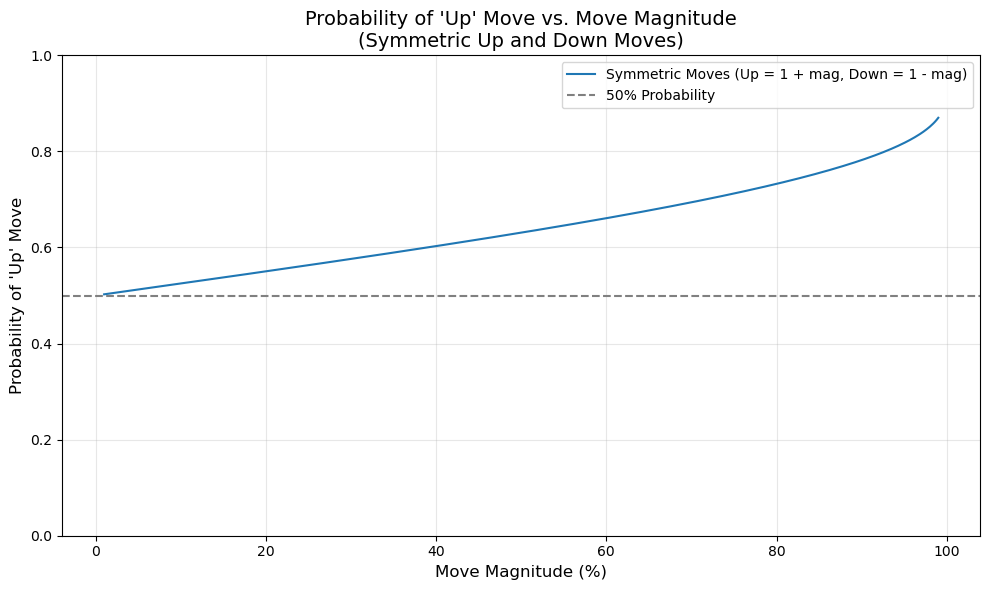

In [3]:
def calculate_probability(up_move, down_move):
    """
    Calculate the probability of an "up" move to keep the expected value at 1
    after an infinite number of steps.
    """
    ln_up = np.log(up_move)
    ln_down = np.log(down_move)
    return -ln_down / (ln_up - ln_down)

move_magnitudes = np.linspace(0.01, 0.99, 500)  # Move magnitudes from 1% to 99% (as decimals)
probabilities = [
    calculate_probability(1 + mag, 1 - mag) for mag in move_magnitudes
]

plt.figure(figsize=(10, 6))
plt.plot(move_magnitudes * 100, probabilities, label="Symmetric Moves (Up = 1 + mag, Down = 1 - mag)")
plt.title("Probability of 'Up' Move vs. Move Magnitude\n(Symmetric Up and Down Moves)", fontsize=14)
plt.xlabel("Move Magnitude (%)", fontsize=12)
plt.ylabel("Probability of 'Up' Move", fontsize=12)
plt.axhline(0.5, color='gray', linestyle='--', label="50% Probability")
plt.ylim(0, 1)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()
